In [209]:
import os
os.getcwd()

'C:\\Users\\sridharvumma\\project\\bigmartsales'

In [210]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [211]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')

In [212]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [213]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [215]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [216]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [217]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [218]:
train['Outlet_Years'] = 2020- train['Outlet_Establishment_Year']
test['Outlet_Years'] = 2020- test['Outlet_Establishment_Year']

In [219]:
train.drop('Outlet_Establishment_Year', axis=1,inplace=True)
test.drop('Outlet_Establishment_Year', axis=1,inplace=True)

In [220]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [221]:
fat_dict= {
          'Low Fat': 'Low Fat',
          'Regular':'Regular',
          'LF':'Low Fat',
          'low fat':'Low Fat',
          'reg':'Regular'
           }

In [222]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(fat_dict)
test['Item_Fat_Content'] =test['Item_Fat_Content'].map(fat_dict)

In [223]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,21
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,13
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,22
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,13
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,35


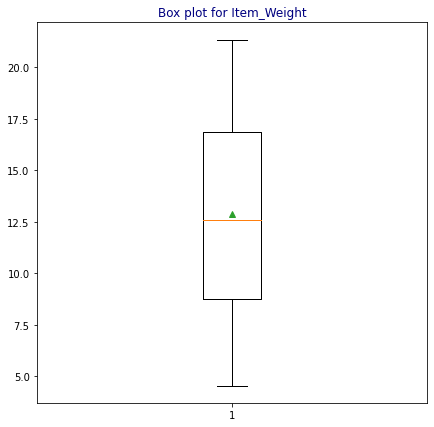

In [224]:
# drop only Itemweight null values and plot a box plot distribution for Item_Weight
fig = plt.figure(figsize=(7,7))
plt.boxplot(train.dropna(subset=['Item_Weight'])['Item_Weight'],showmeans=True)
plt.title('Box plot for Item_Weight', color='navy')
plt.show()

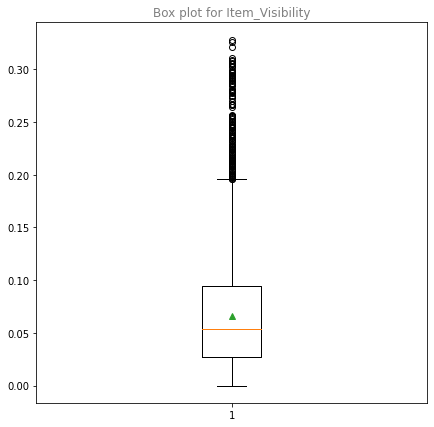

In [225]:
# skewed to the right , plots a box plot distribution for Item_Visibility, outliers are genuine outliers 
# as the shops increase the visibility for better sales, so we dont treat these outliers
fig = plt.figure(figsize=(7,7))
plt.boxplot(train['Item_Visibility'],showmeans=True)
plt.title('Box plot for Item_Visibility', color='grey')
plt.show()

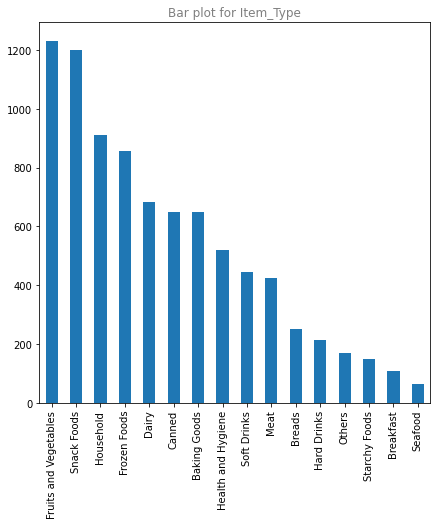

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [226]:
fig = plt.figure(figsize=(7,7))
train['Item_Type'].value_counts(dropna=False).plot(kind='bar')
plt.title('Bar plot for Item_Type', color='grey')
plt.show()
train['Item_Type'].value_counts()

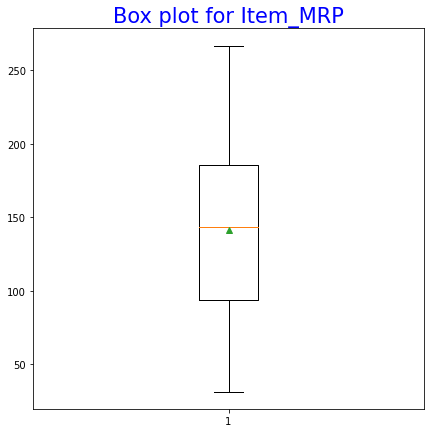

In [227]:
fig = plt.figure(figsize=(7,7))
plt.boxplot(train['Item_MRP'],showmeans=True)
plt.title('Box plot for Item_MRP', fontsize=21, color='blue')
plt.show()


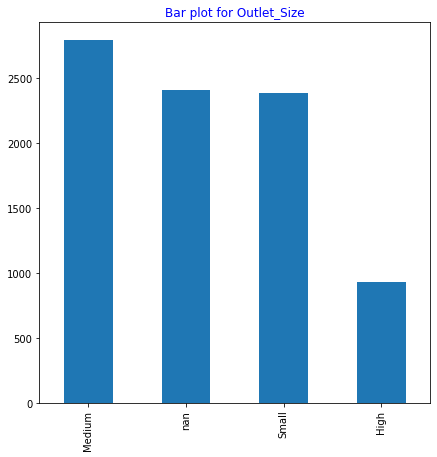

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [228]:
fig = plt.figure(figsize=(7,7))
train['Outlet_Size'].value_counts(dropna=False).plot(kind='bar')
plt.title('Bar plot for Outlet_Size', color='blue')
plt.show()
train['Outlet_Size'].value_counts()

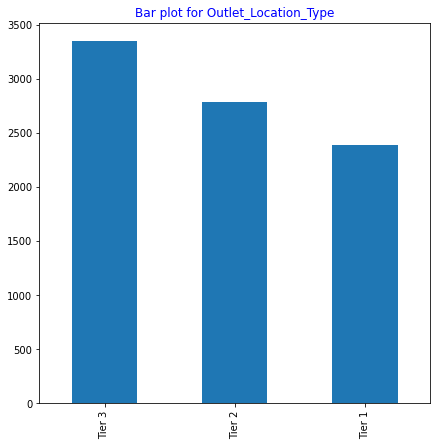

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [229]:
fig = plt.figure(figsize=(7,7))
train['Outlet_Location_Type'].value_counts(dropna=False).plot(kind='bar')
plt.title('Bar plot for Outlet_Location_Type', color='blue')
plt.show()
train['Outlet_Location_Type'].value_counts()

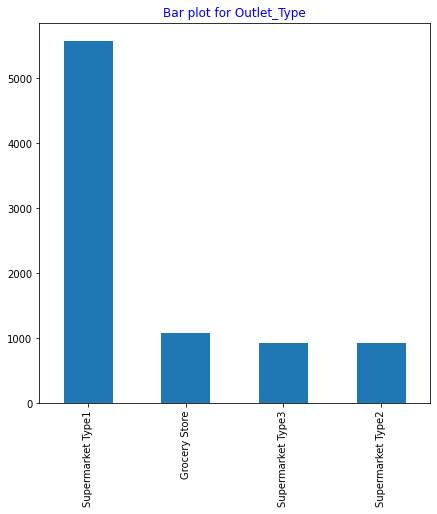

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [230]:
fig = plt.figure(figsize=(7,7))
train['Outlet_Type'].value_counts(dropna=False).plot(kind='bar')
plt.title('Bar plot for Outlet_Type', color='blue')
plt.show()
train['Outlet_Type'].value_counts()

In [231]:
train.pivot_table(index=['Outlet_Type','Outlet_Location_Type'], columns='Outlet_Size',values='Outlet_Identifier',
                 aggfunc='count')

Outlet_Size                              High  Medium  Small
Outlet_Type       Outlet_Location_Type                      
Grocery Store     Tier 1                  NaN     NaN  528.0
Supermarket Type1 Tier 1                  NaN   930.0  930.0
                  Tier 2                  NaN     NaN  930.0
                  Tier 3                932.0     NaN    NaN
Supermarket Type2 Tier 3                  NaN   928.0    NaN
Supermarket Type3 Tier 3                  NaN   935.0    NaN

In [232]:
train.dropna().pivot_table(index=['Outlet_Type','Outlet_Location_Type'], columns='Outlet_Size',values='Outlet_Identifier',
                 aggfunc='count')

Outlet_Size                              High  Medium  Small
Outlet_Type       Outlet_Location_Type                      
Supermarket Type1 Tier 1                  NaN   930.0  930.0
                  Tier 2                  NaN     NaN  930.0
                  Tier 3                932.0     NaN    NaN
Supermarket Type2 Tier 3                  NaN   928.0    NaN

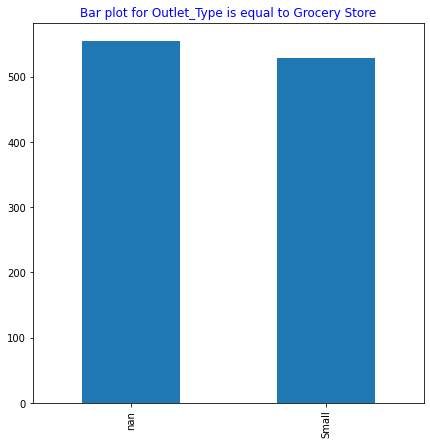

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [233]:
fig = plt.figure(figsize=(7,7))
train[train['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts(dropna=False).plot(kind='bar')
plt.title('Bar plot for Outlet_Type is equal to Grocery Store', color='blue')
plt.show()
train['Outlet_Type'].value_counts()

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Item_Type'>

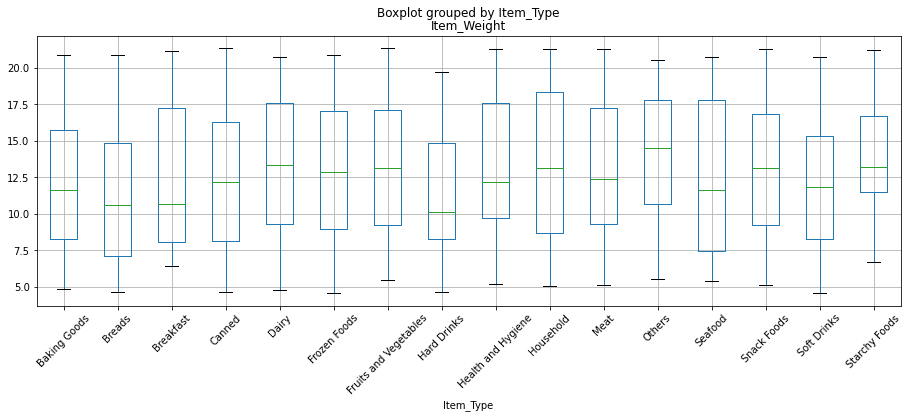

In [234]:
# clearly the average value is around 10 to  15 in weight so we can imput mean for null values of Item_Weight
train.boxplot(column='Item_Weight', by='Item_Type',figsize=(15,5),rot=45)

In [235]:
train.isnull().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
dtype: int64

In [236]:
test.isnull().sum()

Item_Identifier            0
Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Years               0
dtype: int64

In [237]:
train.loc[train['Outlet_Type']=='Supermarket Type2','Outlet_Size' ].value_counts(dropna=False)


Medium    928
Name: Outlet_Size, dtype: int64

In [238]:
test.loc[test['Outlet_Type']=='Supermarket Type2','Outlet_Size'].value_counts(dropna=False)

Medium    618
Name: Outlet_Size, dtype: int64

In [239]:
# imputing all Grocery Stores, Outlet_Size to be small assuming all Groceries  are Small
train.loc[train['Outlet_Type']=='Grocery Store','Outlet_Size'] = 'Small'
test.loc[test['Outlet_Type']=='Grocery Store','Outlet_Size']= 'Small'

In [240]:
train.isnull().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1855
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
dtype: int64

In [241]:
test.isnull().sum()

Item_Identifier            0
Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1236
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Years               0
dtype: int64

In [242]:
train[train['Outlet_Type']=='Supermarket Type2']['Outlet_Size'].value_counts(dropna=False)

Medium    928
Name: Outlet_Size, dtype: int64

In [243]:
test[test['Outlet_Type']=='Supermarket Type2']['Outlet_Size'].value_counts(dropna=False)

Medium    618
Name: Outlet_Size, dtype: int64

In [244]:
train.loc[train['Outlet_Type']=='Supermarket Type2', 'Outlet_Size']

1       Medium
5       Medium
16      Medium
31      Medium
32      Medium
         ...  
8506    Medium
8511    Medium
8515    Medium
8516    Medium
8521    Medium
Name: Outlet_Size, Length: 928, dtype: object

In [245]:
if len(train['Outlet_Identifier'])==train.shape[0]:
    print('outliet_Identifier is unique')

outliet_Identifier is unique


In [246]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33


In [201]:
# Skip running this 
#need to findout why this is not working
#assuming all Outlet_Size of SuperMarket Type2 to be Medium
train.loc[train['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = train['Outlet_Size'].fillna('Medium')
test.loc[test['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [251]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,22.168133
std,4.643456,0.051598,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,3101.296400,33.000000
max,21.350000,0.328391,266.888400,13086.964800,35.000000


In [252]:
train.shape

(8523, 12)

In [254]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [257]:
train[train['Item_Identifier']=='FDU28']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,13
6362,FDU28,NaN,Regular,0.164439,Frozen Foods,188.4214,OUT019,Small,Tier 1,Grocery Store,376.8428,35
6419,FDU28,19.2,Regular,0.094301,Frozen Foods,187.5214,OUT018,Medium,Tier 3,Supermarket Type2,1695.7926,11
7597,FDU28,NaN,Regular,0.093464,Frozen Foods,189.1214,OUT027,Medium,Tier 3,Supermarket Type3,2261.0568,35
8419,FDU28,19.2,Regular,0.093918,Frozen Foods,189.8214,OUT046,Small,Tier 1,Supermarket Type1,942.1070,23


In [258]:
train_data= pd.DataFrame()

for item in list(set(train['Item_Identifier'])):
    temp= train[train['Item_Identifier']== item].copy()
    
    temp['Item_Weight'].fillna(temp['Item_Weight'].mean(),inplace=True)
    train_data = train_data.append(temp)

In [259]:
train_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
2115,DRH25,18.7,Low Fat,0.014676,Soft Drinks,50.8324,OUT017,NaN,Tier 2,Supermarket Type1,934.7832,13
2606,DRH25,18.7,Low Fat,0.000000,Soft Drinks,52.2324,OUT035,Small,Tier 2,Supermarket Type1,467.3916,16
5820,DRH25,18.7,Low Fat,0.014623,Soft Drinks,52.0324,OUT045,NaN,Tier 2,Supermarket Type1,1090.5804,18
6658,DRH25,18.7,Low Fat,0.024426,Soft Drinks,52.9324,OUT010,Small,Tier 3,Grocery Store,51.9324,22
8140,DRH25,18.7,Low Fat,0.014581,Soft Drinks,50.2324,OUT013,High,Tier 3,Supermarket Type1,623.1888,33


In [260]:
test_data= pd.DataFrame()

for item in list(set(test['Item_Identifier'])):
    temp= test[test['Item_Identifier']== item].copy()
    
    temp['Item_Weight'].fillna(temp['Item_Weight'].mean(),inplace=True)
    test_data = test_data.append(temp) 

In [261]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
816,FDO58,19.6,Low Fat,0.039801,Snack Foods,162.4526,OUT017,NaN,Tier 2,Supermarket Type1,13
818,FDO58,19.6,Low Fat,0.039657,Snack Foods,165.7526,OUT045,NaN,Tier 2,Supermarket Type1,18
2472,FDO58,19.6,Low Fat,0.069295,Snack Foods,162.5526,OUT019,Small,Tier 1,Grocery Store,35
1033,FDK55,18.5,Low Fat,0.025762,Meat,87.6172,OUT046,Small,Tier 1,Supermarket Type1,23
1488,FDK55,18.5,Low Fat,0.025637,Meat,89.1172,OUT027,Medium,Tier 3,Supermarket Type3,35


In [262]:
# train['Item_Weight'].value_counts().idxmax()
train_data.isnull().sum()

Item_Identifier            0
Item_Weight                4
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1855
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
dtype: int64

In [263]:
test_data.isnull().sum()

Item_Identifier            0
Item_Weight               20
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1236
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Years               0
dtype: int64

In [264]:
train_data.loc[train_data['Item_Weight'].isnull(),:]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,Medium,Tier 3,Supermarket Type3,3453.5046,35
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,Small,Tier 1,Grocery Store,120.5098,35
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,Medium,Tier 3,Supermarket Type3,4434.2280,35
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,Medium,Tier 3,Supermarket Type3,1569.9564,35


In [265]:
train_prod_codes = list(train_data[train_data['Item_Weight'].isnull()]['Item_Identifier'])
train_prod_codes

['FDE52', 'FDQ60', 'FDK57', 'FDN52']

In [267]:
test_prod_codes = list(test_data[test_data['Item_Weight'].isnull()]['Item_Identifier'])
test_prod_codes

['FDF22',
 'FDF22',
 'NCJ30',
 'FDG09',
 'FDO22',
 'FDG50',
 'FDG50',
 'FDF04',
 'FDY57',
 'FDH58',
 'FDG57',
 'FDI45',
 'FDI45',
 'FDP28',
 'FDJ09',
 'FDF05',
 'DRN47',
 'FDT21',
 'FDL58',
 'FDL58']

In [268]:
# Till 'FDG50', it is a dataframe, iloc[0] gives that row, access 'Item_weight' value 
#  train[train['Item_Identifier'] == 'FDG57'].iloc[0]['Item_Weight']
train[train['Item_Identifier'] == 'FDG57'].iloc[0]['Item_Weight']


14.7

In [269]:
product_price_test = []
for item in test_prod_codes:
    product_price_test.append(train[train['Item_Identifier']== item].iloc[0]['Item_Weight'])
dictionary_test = dict(zip(test_prod_codes,product_price_test))
dictionary_test

{'FDF22': 6.865,
 'NCJ30': 5.82,
 'FDG09': 20.6,
 'FDO22': 13.5,
 'FDG50': 7.405,
 'FDF04': 17.5,
 'FDY57': 20.2,
 'FDH58': 12.3,
 'FDG57': 14.7,
 'FDI45': 13.1,
 'FDP28': 13.65,
 'FDJ09': 15.0,
 'FDF05': 17.5,
 'DRN47': 12.1,
 'FDT21': 7.42,
 'FDL58': 5.78}

In [270]:
product_price_train =[]
for item in train_prod_codes:
    product_price_train.append(test[test['Item_Identifier']== item].iloc[0]['Item_Weight'])
dictionary_train = dict(zip(train_prod_codes, product_price_train))
dictionary_train

{'FDE52': 10.395, 'FDQ60': 6.195, 'FDK57': 10.195, 'FDN52': 9.395}

In [271]:
train_data['Item_Identifier'].map(dictionary_train)

1200   NaN
1299   NaN
1838   NaN
2509   NaN
7532   NaN
        ..
2115   NaN
2606   NaN
5820   NaN
6658   NaN
8140   NaN
Name: Item_Identifier, Length: 8523, dtype: float64

In [101]:
len(train_data['Item_Identifier'].map(dictionary_train))

8523

In [272]:
# have to understand this did not understand well
train_data.loc[train_data['Item_Weight'].isnull(),'Item_Weight']=train_data['Item_Identifier'].map(dictionary_train)

In [273]:
# have to understand this did not understand well
test_data.loc[test_data['Item_Weight'].isnull(),'Item_Weight'] = test_data['Item_Identifier'].map(dictionary_test)

In [274]:
train_data.isnull().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1855
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
dtype: int64

In [275]:
test_data.isnull().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1236
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Years               0
dtype: int64

In [276]:
# train['Item_Weight'].fillna(train['Item_Weight'].value_counts().idxmax(), inplace=True)
train_data['Outlet_Size'].unique()

array(['High', 'Small', 'Medium', nan], dtype=object)

In [277]:
train_data['Outlet_Size'].value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [278]:
train_data.isnull().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1855
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
dtype: int64

In [279]:
test_data.isnull().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1236
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Years               0
dtype: int64

In [280]:
train_data.loc[train_data['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'] = train_data['Outlet_Size'].fillna('Small')
train_data.loc[train_data['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = train_data['Outlet_Size'].fillna('Medium')

In [281]:
test_data.loc[test_data['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'] = test_data['Outlet_Size'].fillna('Small')
test_data.loc[test_data['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = test_data['Outlet_Size'].fillna('Medium')

In [282]:
train_data.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Years            0
dtype: int64

In [283]:
test_data.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Years            0
dtype: int64

In [284]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [285]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [286]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
1200,FDO58,19.6,Low Fat,0.039544,Snack Foods,163.6526,OUT013,High,Tier 3,Supermarket Type1,1151.1682,33
1299,FDO58,19.6,Low Fat,0.039577,Snack Foods,166.1526,OUT046,Small,Tier 1,Supermarket Type1,2960.1468,23
1838,FDO58,19.6,Low Fat,0.039570,Snack Foods,165.9526,OUT035,Small,Tier 2,Supermarket Type1,2631.2416,16
2509,FDO58,19.6,Low Fat,0.039738,Snack Foods,163.7526,OUT018,Medium,Tier 3,Supermarket Type2,2960.1468,11
7532,FDO58,19.6,Low Fat,0.039386,Snack Foods,164.8526,OUT027,Medium,Tier 3,Supermarket Type3,2631.2416,35


In [287]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
816,FDO58,19.6,Low Fat,0.039801,Snack Foods,162.4526,OUT017,Small,Tier 2,Supermarket Type1,13
818,FDO58,19.6,Low Fat,0.039657,Snack Foods,165.7526,OUT045,Small,Tier 2,Supermarket Type1,18
2472,FDO58,19.6,Low Fat,0.069295,Snack Foods,162.5526,OUT019,Small,Tier 1,Grocery Store,35
1033,FDK55,18.5,Low Fat,0.025762,Meat,87.6172,OUT046,Small,Tier 1,Supermarket Type1,23
1488,FDK55,18.5,Low Fat,0.025637,Meat,89.1172,OUT027,Medium,Tier 3,Supermarket Type3,35


In [294]:
train_data.to_csv('trainData.csv',index=False)

In [295]:
test_data.to_csv('testData.csv',index=False)

In [296]:
train_data.pivot_table(index=['Outlet_Type','Outlet_Location_Type'],columns='Outlet_Size',values='Outlet_Identifier',aggfunc='count')

Outlet_Size                              High  Medium   Small
Outlet_Type       Outlet_Location_Type                       
Grocery Store     Tier 1                  NaN     NaN   528.0
                  Tier 3                  NaN     NaN   555.0
Supermarket Type1 Tier 1                  NaN   930.0   930.0
                  Tier 2                  NaN     NaN  2785.0
                  Tier 3                932.0     NaN     NaN
Supermarket Type2 Tier 3                  NaN   928.0     NaN
Supermarket Type3 Tier 3                  NaN   935.0     NaN

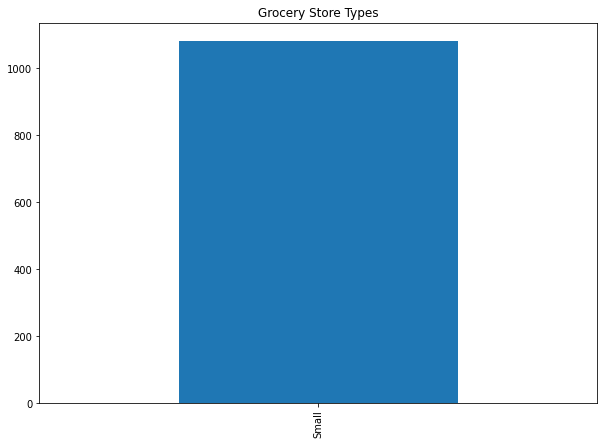

In [297]:
fig = plt.figure(figsize=(10,7))
train_data[train_data['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts(dropna=False).plot(kind='bar')
plt.title('Grocery Store Types')
plt.show()

# Data Preprocessing

In [318]:
traindata=pd.read_csv('trainData.csv')

In [320]:
testdata=pd.read_csv('testData.csv')

In [321]:
traindata[traindata['Item_Visibility']==0].shape

(526, 12)

In [322]:
train_data =pd.DataFrame()
for item in list(set(traindata['Item_Identifier'])):
    temp = traindata[traindata['Item_Identifier']==item].copy()
    temp['Item_Visibility']= temp['Item_Visibility'].replace(0,temp['Item_Visibility'].mean())
    train_data = train_data.append(temp,ignore_index=False)

In [323]:
test_data = pd.DataFrame()
for item in list(set(testdata['Item_Identifier'])):
  temp = testdata[testdata['Item_Identifier']==item].copy()
  temp['Item_Visibility'] = temp['Item_Visibility'].replace(0, temp['Item_Visibility'].mean())
  test_data = test_data.append(temp,ignore_index=False)

In [324]:
train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[:2])
train_data['Item_Type_Combined']  = train_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [325]:
#Get the first two characters of ID:
test_data['Item_Type_Combined'] = test_data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test_data['Item_Type_Combined'] = test_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test_data['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [326]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [327]:
categorical=train_data.select_dtypes(exclude=np.number).columns
for column in list(categorical):
    if column=='Item_Identifier' or column=='Outlet_Identifier':
        continue;
    else:
        train_data[column] =le.fit_transform(train_data[column])
        test_data[column] =le.fit_transform(test_data[column])
            

In [329]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDO58,19.6,0,0.039544,13,163.6526,OUT013,0,2,1,1151.1682,33,1
1,FDO58,19.6,0,0.039577,13,166.1526,OUT046,2,0,1,2960.1468,23,1
2,FDO58,19.6,0,0.039570,13,165.9526,OUT035,2,1,1,2631.2416,16,1
3,FDO58,19.6,0,0.039738,13,163.7526,OUT018,1,2,2,2960.1468,11,1
4,FDO58,19.6,0,0.039386,13,164.8526,OUT027,1,2,3,2631.2416,35,1


In [331]:
train_data.to_csv('traindata.csv',index=False)
test_data.to_csv('testdata.csv',index=False)

# Modelling

# Linear Regression

In [ ]:
train=pd.read_csv('traindata.csv')

In [334]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDO58,19.6,0,0.039544,13,163.6526,OUT013,0,2,1,1151.1682,33,1
1,FDO58,19.6,0,0.039577,13,166.1526,OUT046,2,0,1,2960.1468,23,1
2,FDO58,19.6,0,0.039570,13,165.9526,OUT035,2,1,1,2631.2416,16,1
3,FDO58,19.6,0,0.039738,13,163.7526,OUT018,1,2,2,2960.1468,11,1
4,FDO58,19.6,0,0.039386,13,164.8526,OUT027,1,2,3,2631.2416,35,1


In [366]:
X_test=pd.read_csv('testdata.csv')


In [367]:
test =X_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [368]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']

In [369]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
y_pred_lr = regressor.predict(test)

-442.2543696988323
[-6.79152294e-01  5.41258032e+01 -1.68054305e+03 -9.06649731e-01
  1.55782823e+01 -1.35745594e+02 -3.00638207e+02  9.43149399e+02
 -1.71092905e+00 -2.07562442e+01]


In [370]:
X_test['Item_Outlet_Sales']= y_pred_lr

In [371]:
submission = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [372]:
submission.to_csv('LinearRegressionSubmission.csv')

# Ridge Regression

In [378]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train) 
ridge_prediction = abs(ridge.predict(test))

In [379]:
X_test['Item_Outlet_Sales']= ridge_prediction
submission = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submission.to_csv('RidgeRegressionSubmission.csv',index=False)

# Decision Tree Regression

In [383]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(X_train, y_train) 
DT_prediction = DT.predict(test)

In [384]:
X_test['Item_Outlet_Sales']=DT_prediction
submission = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submission.to_csv('DTRegressionSubmission.csv',index=False)

# Decision Tree Regression2

In [387]:
from sklearn.tree import DecisionTreeRegressor
DT1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
DT1.fit(X_train, y_train) 
DT1_prediction = DT1.predict(test)

In [388]:
X_test['Item_Outlet_Sales']=DT1_prediction
DT1Pred = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
DT1Pred.to_csv('DTRegression1Submission2.csv',index=False)

# RandomForest Regressor

In [389]:
!pip3 install lightgbm


You should consider upgrading via the 'e:\pythonforselenium\python.exe -m pip install --upgrade pip' command.


# LightGBM

In [396]:
from lightgbm import LGBMRegressor
light = LGBMRegressor(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split')
light.fit(X_train, y_train) 
light_prediction = light.predict(test)
X_test['Item_Outlet_Sales']=light_prediction
lightPred = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
lightPred.to_csv('LightGBMRegressionSubmission.csv',index=False)

# XGboost

In [398]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train) 
xg_prediction = abs(xg.predict(test))
X_test['Item_Outlet_Sales']=xg_prediction
xgPred = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
xgPred.to_csv('XGBoostRegressionSubmission.csv',index=False)

# SVR

In [399]:
from sklearn.svm import SVR
modelSVR = SVR(kernel = 'rbf')
modelSVR.fit(X_train, y_train)
svr_prediction =abs(modelSVR.predict(test))
X_test['Item_Outlet_Sales']=svr_prediction
xgPred = X_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
xgPred.to_csv('SVRRegressionSubmission.csv',index=False)